In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings("ignore")

In [2]:
absent = pd.read_csv('Absenteeism.csv',sep=';')
absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
absent.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [4]:
absent['Absenteeism time in hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

In [5]:
absent['Work load Average/day '].unique()

array([239.554, 205.917, 241.476, 253.465, 306.345, 261.306, 308.593,
       302.585, 343.253, 326.452, 378.884, 377.55 , 275.312, 265.615,
       294.217, 265.017, 284.031, 236.629, 330.061, 251.818, 244.387,
       239.409, 246.074, 253.957, 230.29 , 249.797, 261.756, 284.853,
       268.519, 280.549, 313.532, 264.249, 222.196, 246.288, 237.656,
       275.089, 264.604, 271.219])

In [6]:
absent['Hit target'].unique()

array([ 97,  92,  93,  95,  99,  96,  94,  98,  81,  88, 100,  87,  91],
      dtype=int64)

In [7]:
absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
#outliers can be observed very less as  75 pecentile and max are quite close

In [9]:
absent.info()  # all variable are numerical and ID needs to be dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [10]:
absent.drop(['ID'],axis=1,inplace=True)

In [11]:
absent

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


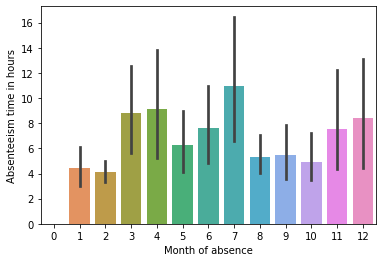

In [12]:
sns.barplot(x="Month of absence",y='Absenteeism time in hours',data=absent)

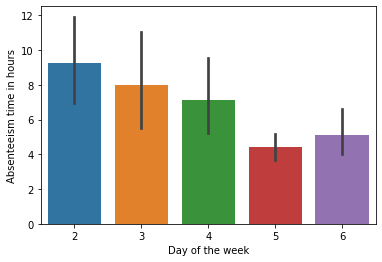

In [13]:
sns.barplot(x="Day of the week",y='Absenteeism time in hours',data=absent)

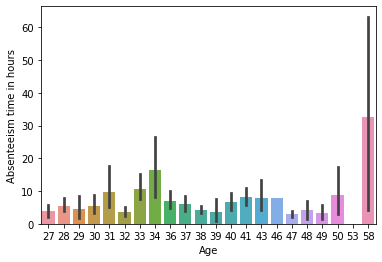

In [14]:
sns.barplot(x="Age",y='Absenteeism time in hours',data=absent)

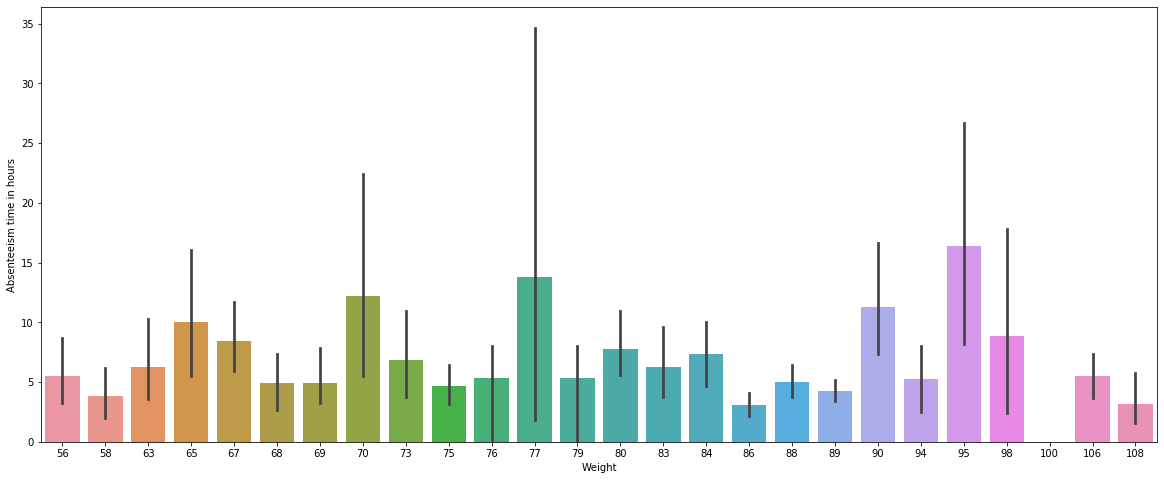

In [15]:
plt.figure(figsize=(20,8))
sns.barplot(x="Weight",y='Absenteeism time in hours',data=absent)
plt.show()

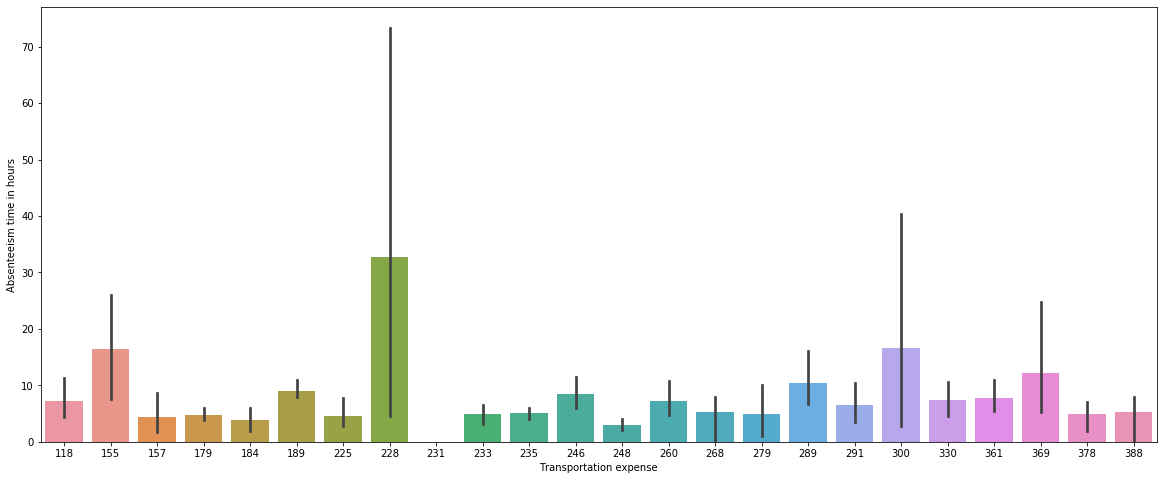

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(x="Transportation expense",y='Absenteeism time in hours',data=absent)
plt.show()

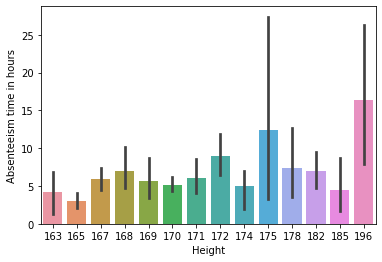

In [17]:
sns.barplot(x='Height',y='Absenteeism time in hours',data=absent)

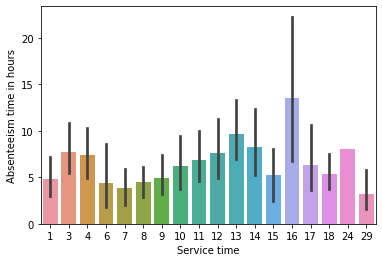

In [18]:
sns.barplot(x="Service time",y='Absenteeism time in hours',data=absent)

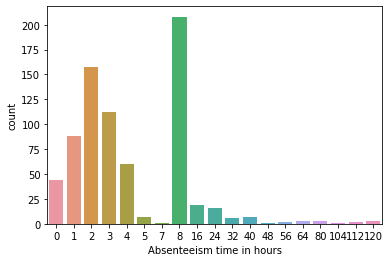

In [19]:
sns.countplot(x='Absenteeism time in hours',data=absent)

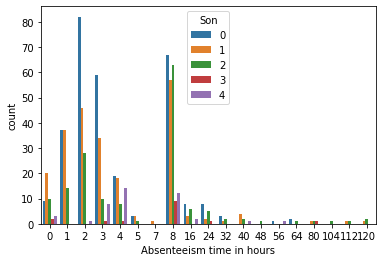

In [20]:
sns.countplot(x='Absenteeism time in hours',data=absent,hue='Son')

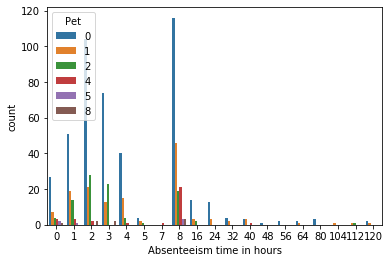

In [21]:
sns.countplot(x='Absenteeism time in hours',data=absent,hue='Pet')

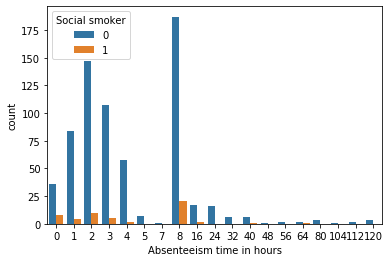

In [22]:
sns.countplot(x='Absenteeism time in hours',data=absent,hue='Social smoker')

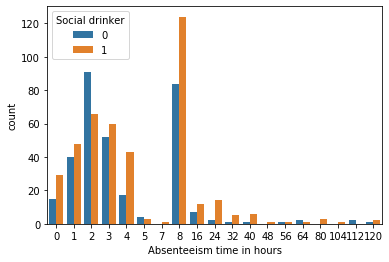

In [23]:
sns.countplot(x='Absenteeism time in hours',data=absent,hue='Social drinker')

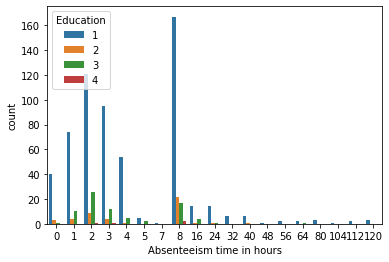

In [24]:
sns.countplot(x='Absenteeism time in hours',data=absent,hue='Education')

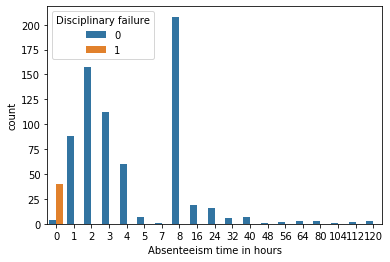

In [25]:
sns.countplot(x='Absenteeism time in hours',data=absent,hue='Disciplinary failure')

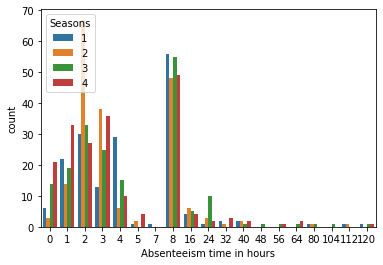

In [26]:
sns.countplot(x='Absenteeism time in hours',data=absent,hue='Seasons')

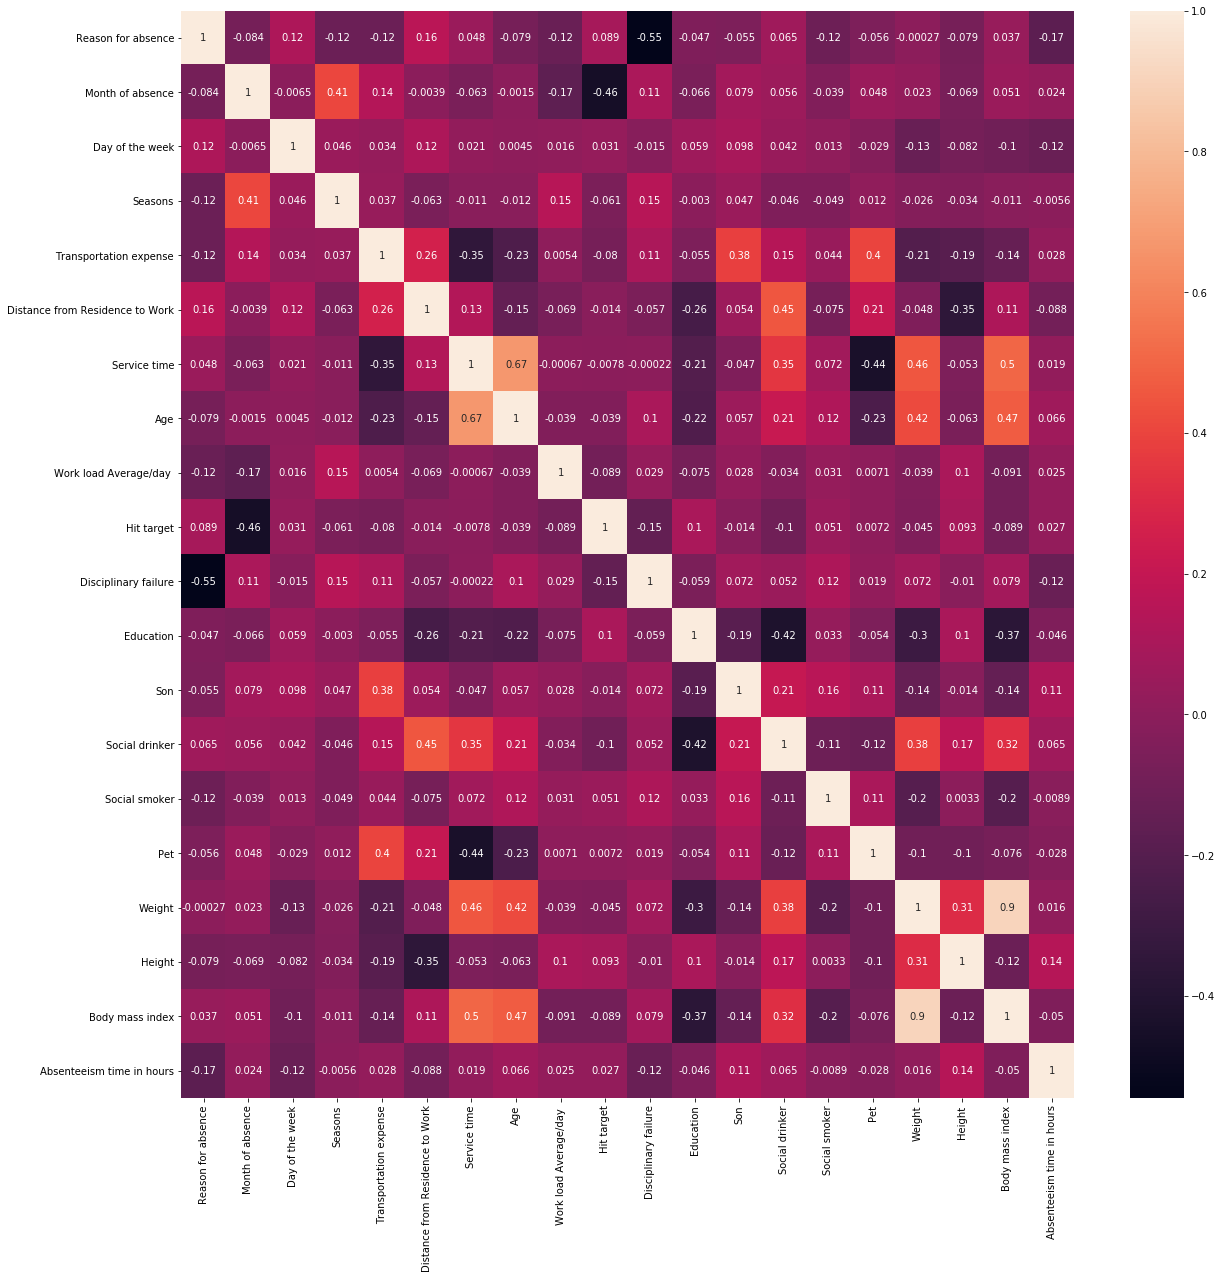

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(absent.corr(),annot=True)
plt.show()

In [28]:
from scipy.stats import zscore
z = np.abs(zscore(absent))
z
print(absent.shape)
absent_new=absent.loc[(z<3).all(axis=1)]
print(absent_new.shape)

(740, 20)
(576, 20)


In [29]:
x = absent.drop('Absenteeism time in hours',axis=1)
df_x = absent.drop('Absenteeism time in hours',axis=1)

In [30]:
x

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35


In [31]:
y = absent['Absenteeism time in hours']

In [32]:
y

0      4
1      0
2      2
3      4
4      2
      ..
735    8
736    4
737    0
738    0
739    0
Name: Absenteeism time in hours, Length: 740, dtype: int64

In [33]:
x.skew()

Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df_x.columns)

In [35]:
x.skew()

Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
dtype: float64

In [36]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.875472,0.221775,-0.624995,-1.378388,1.019026,0.541394,0.096811,-0.467535,-0.865626,0.608049,-0.239046,-0.459452,1.037959,0.872872,-0.280566,0.936518,0.850932,0.362675,0.806421
1,-1.717662,0.221775,-0.624995,-1.378388,-1.701592,-1.198290,1.246109,1.823719,-0.865626,0.608049,4.183300,-0.459452,0.266136,0.872872,-0.280566,-0.762967,1.476873,1.280588,1.013247
2,0.263955,0.221775,0.098082,-1.378388,-0.596508,1.350968,1.246109,0.370058,-0.865626,0.608049,-0.239046,-0.459452,-1.100139,0.872872,-0.280566,-0.762967,0.772818,-0.203850,1.013247
3,-1.362853,0.221775,0.778917,-1.378388,0.890437,-1.951959,0.325677,0.513838,-0.865626,0.608049,-0.239046,-0.459452,1.037959,0.872872,3.564226,-0.762967,-0.857808,-0.963555,-0.591550
4,0.263955,0.221775,0.778917,-1.378388,1.019026,0.541394,0.096811,-0.467535,-0.865626,0.608049,-0.239046,-0.459452,1.037959,0.872872,-0.280566,0.936518,0.850932,0.362675,0.806421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.875653,0.221775,-0.624995,-1.378388,1.019026,0.541394,0.096811,-0.467535,0.018866,-0.628096,-0.239046,-0.459452,1.037959,0.872872,-0.280566,0.936518,0.850932,0.362675,0.806421
736,-1.107164,0.221775,-0.624995,-1.378388,0.289727,-1.380764,0.325677,0.219325,0.018866,-0.628096,-0.239046,2.197871,0.266136,-1.145644,-0.280566,0.936518,0.694737,0.362675,0.594020
737,-1.717662,-1.899084,-0.624995,-1.378388,-1.701592,-1.108624,0.096811,0.651709,0.211111,-0.096055,-0.239046,-0.459452,0.266136,0.872872,-0.280566,1.983635,1.476873,-0.203850,1.607177
738,-1.717662,-1.899084,0.098082,-0.500363,0.231547,0.480884,0.325677,0.513838,0.211111,-0.096055,-0.239046,-0.459452,1.037959,0.872872,-0.280566,1.435514,1.633611,-0.203850,1.797916


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [38]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
from xgboost import XGBClassifier

In [39]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 19}

In [40]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 5}

In [41]:
knn =KNeighborsClassifier(n_neighbors=19)
svc = SVC()
dt= DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators= 11)
xgb = XGBClassifier()

In [42]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.37142857142857144
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  7  3  2  0  3  1  0  1  0  0  0  0  0  0  0  1]
 [ 0 13 18  6  8  0 10  2  0  0  0  0  0  0  0  0  1  0]
 [ 0  7  4 15  1  1  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  5  5  2  1  4  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  8  7  6  0 31  3  2  1  1  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  2  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 

In [43]:

svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.4326530612244898
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  8  2  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  7 22 14  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  6  8 12  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  6  1  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  3  8  2  0  0 54  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.17      0.14      0.15        29
 

In [44]:
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc = svc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.4326530612244898
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  8  2  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  7 22 14  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  6  8 12  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  6  1  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  3  8  2  0  0 54  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.17      0.14      0.15        29
 

In [45]:
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
predxgb = xgb.predict(x_test)
print(accuracy_score(y_test,predxgb))
print(confusion_matrix(y_test,predxgb))
print(classification_report(y_test,predxgb))

0.45714285714285713
[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  7  1  1  1  9  1  0  0  0  0  0  0  0  1]
 [ 0 10 22  8  6  1  9  2  0  0  0  0  0  0  0  0]
 [ 0  6  5 14  2  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  5  1  3  4  1  7  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  4  3  3  2  0 49  0  5  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  2  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.24      0.28      0.25        29


In [46]:
pred = xgb.predict_proba(x_test)[:,1]
pred

array([2.34845723e-03, 1.52194768e-01, 3.54614784e-03, 4.08416800e-02,
       3.19164023e-02, 1.74973935e-01, 1.84290140e-04, 6.19272888e-03,
       2.44838465e-03, 4.31744128e-01, 4.58341892e-05, 1.01303776e-04,
       3.87355685e-02, 3.17629916e-03, 1.63934572e-04, 7.92788924e-04,
       9.42726970e-01, 5.28391276e-04, 8.24810530e-04, 6.88337488e-03,
       5.29112294e-04, 4.26757991e-01, 1.65953115e-02, 9.63291270e-04,
       4.24617268e-02, 2.26174039e-03, 2.97494441e-01, 8.38555098e-02,
       2.29806647e-01, 1.17423700e-03, 1.68431579e-04, 2.70467773e-02,
       6.99980631e-02, 9.72663537e-02, 2.56380349e-01, 1.30791143e-02,
       3.37932329e-03, 4.47561331e-02, 3.62378050e-04, 3.50168673e-03,
       2.06077675e-04, 6.17180206e-03, 5.38389395e-05, 7.17394203e-02,
       5.88026568e-02, 8.10858328e-04, 3.12492903e-03, 1.47208106e-04,
       4.94220138e-01, 2.25880947e-02, 5.25400400e-01, 1.12111113e-04,
       8.78568646e-03, 9.88663137e-01, 1.71692751e-03, 2.19994239e-04,
      

In [47]:
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label =True)

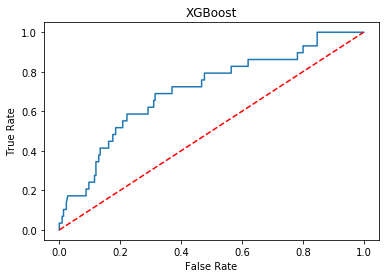

In [48]:
plt.plot(fpr,tpr,label= "XGBoost")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Rate")
plt.ylabel('True Rate')
plt.title("XGBoost")
plt.show()

In [49]:
from sklearn.externals import joblib
joblib.dump(xgb,"Absenteeism.obj")

['Absenteeism.obj']

In [50]:
model = joblib.load('Absenteeism.obj')
model.predict(x_test)

array([  2,   8,   8,   8,   8,   4,   3,   8,   8,   3,   0,   0,   8,
        24,   0,   8,   1,   2,   8,   4,   8,   2,   8,   0,   2,   8,
         8,   8,   3,  24,   8,   4,   8,   2,   5,   3,   8,   8,   2,
         8,   8,  24,   8,   2,   2,   2,   8,   8,   1,  16,   1,   8,
         8,   1,   8,   0,   1,   0,   8,   8,   8,   1,   3,   3,   8,
        40,   4,   1,   3,  24,  16,   8,   3,   4,   8,   8,   3,   3,
         8,  40, 120,   4,   8,   8,   8,   0,   4,   8,   8,   8,   1,
         0,   8,   1,   8,   2,   4,   1,   8,   8,   2,   8,   8,   4,
         3,   3,  24,   2,   0,   2,   8,   8,   1,   3,   8,   2,   2,
         1,   8,   8,   1,   8,   8,   1,   2,   4,   0,   2,   8,   8,
         3,   2,   3,   3,   8,   8,   8,   1,   8,   1,   1,   3,  24,
         3,   2,   2,   2,   1,   8,   0,   8,   2,   1,   3,   8,   3,
         8,   8,   8,   5,   8,   3,   3,   1,   1,   8,   8,   1,   1,
         1,   8,   2,   3,   2,   2,   8,  24,   8,   1,   2,   